In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, cv2

In [2]:
LEVELS     = np.array([1, 0.8, 1.2])
NUM_ADJUST = len(LEVELS) ** 3

# changes every image
saturation = np.array([(1.0, x, 1.0) for x in LEVELS])
# changes every 3 images
contrast   = np.tile(np.repeat((1 - LEVELS) * 100, [3, 3, 3]), 3)
# changes every 9 images
brightness = np.repeat(LEVELS, [9, 9, 9])

def adjust_image(input_image):
    (img_h, img_w, img_c) = input_image.shape

    input_hsv = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV).astype(float)
    adjusted  = np.tile(input_hsv, [NUM_ADJUST, 1, 1]).reshape((-1, 3))

    adjusted *= np.tile(saturation.repeat(img_h * img_w, axis = 0), (9,1))
    adjusted  = adjusted.reshape((NUM_ADJUST, img_h, img_w, img_c)).astype(np.uint8)

    for idx, img in enumerate(adjusted):
        adjusted[idx] = cv2.cvtColor(adjusted[idx], cv2.COLOR_HSV2RGB)

    adjusted = adjusted.reshape((NUM_ADJUST, -1)) * brightness[:,None] + contrast[:,None]
    adjusted[adjusted > 255] = 255
    adjusted[adjusted < 0]   = 0

    adjusted = adjusted.reshape((NUM_ADJUST, img_h, img_w, img_c)).astype(np.uint8)
    return adjusted

(408, 612, 3)
Finished in 0.34 seconds


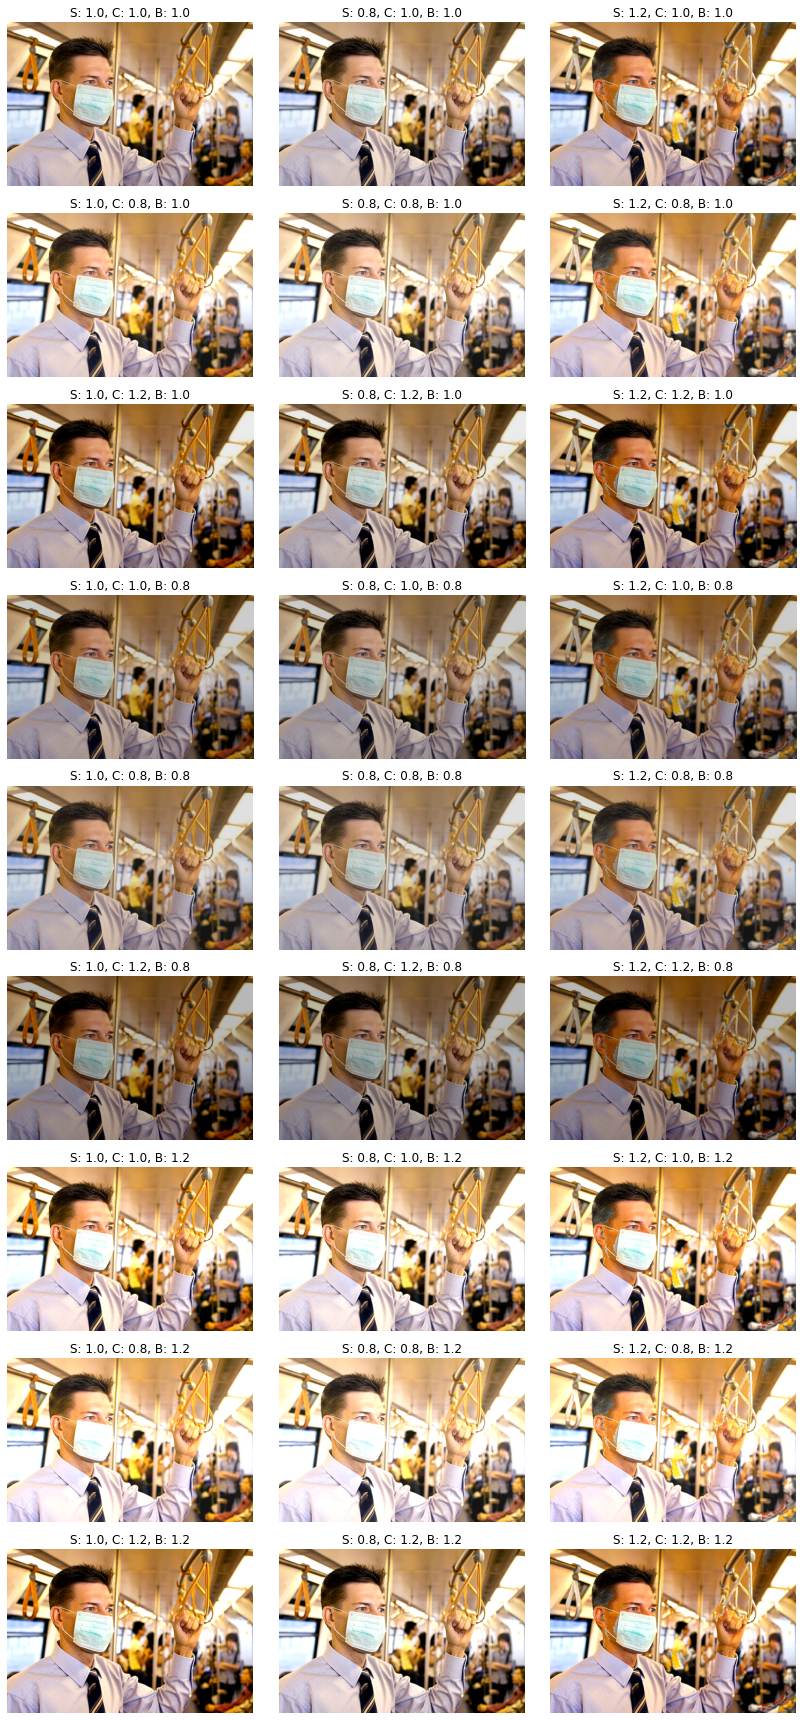

In [4]:
# For testing purposes
IMG_DIR     = '../DatasetCleaning/Sortedface_with_mask'
IMAGE_FILES = [ os.path.join(IMG_DIR, x) for x in os.listdir(IMG_DIR) ]

test_image = cv2.cvtColor(cv2.imread(IMAGE_FILES[0]), cv2.COLOR_BGR2RGB)
print(test_image.shape)

beg = time.perf_counter()
adjusted_imgs = adjust_image(test_image)
end = time.perf_counter()

print('Finished in {:.2f} seconds'.format(end - beg))

fig, ax = plt.subplots(9, 3, figsize=(12,24))
for idx, img in enumerate(adjusted_imgs):
    plt_row  = idx // 3
    plt_col  = idx % 3
    
    title = 'S: {}, C: {}, B: {}'.format(LEVELS[plt_col],
                                         LEVELS[(idx // 3) % 3],
                                         LEVELS[(plt_row // 3) % 3])
    ax[plt_row, plt_col].set_title(title)
    ax[plt_row, plt_col].imshow(img)
    ax[plt_row, plt_col].axis('off')

plt.subplots_adjust(wspace=0, hspace=None)
plt.tight_layout()
plt.show()